In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import pandas as pd
import numpy as np 
import tensorflow as tf
import seaborn as sns
import pickle as pkl
import matplotlib.pyplot as plt


import sklearn 
import datetime

In [3]:
# Display

pd.set_option('max_colwidth', 800)
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
# reading dataset
dataset_path = './dataset/train/train.csv'
df = pd.read_csv(dataset_path)
df.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b752eebc9b50313e152,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9acf56eb3b04793d9ae5,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de01f640b7e4729b49fce,7.706428
1,03930f033646d073462b35d411616323597715ac4fc3982021ff25387177a782,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9acf56eb3b04793d9ae5,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac8f9e9a2596173f80c9,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf11ea2bb87c4b0100a4,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9acf56eb3b04793d9ae5,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da5045d77f3b4185d8f790,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04782dcd41548b3974b5,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9acf56eb3b04793d9ae5,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb294ba12c85962b0a9842,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9acf56eb3b04793d9ae5,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35,7.059346


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341424 entries, 0 to 341423
Data columns (total 24 columns):
reservation_id                        341424 non-null object
booking_date                          341424 non-null object
checkin_date                          341424 non-null object
checkout_date                         341424 non-null object
channel_code                          341424 non-null int64
main_product_code                     341424 non-null int64
numberofadults                        341424 non-null int64
numberofchildren                      341424 non-null int64
persontravellingid                    341424 non-null int64
resort_region_code                    341424 non-null int64
resort_type_code                      341424 non-null int64
room_type_booked_code                 341424 non-null int64
roomnights                            341424 non-null int64
season_holidayed_code                 341310 non-null float64
state_code_residence                  33666

In [6]:
df.describe()

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,booking_type_code,amount_spent_per_room_night_scaled
count,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341310.000000,336660.000000,341424.000000,341424.000000,341424.000000,341424.000000
mean,1.902810,2.208738,3.275361,0.362696,210.288905,1.772960,2.193832,2.890321,3.738346,2.673862,7.260708,4.763303,3.193390,1.124209,7.720801
std,0.915311,0.823779,1.756062,0.758019,865.735577,0.750806,1.551451,0.804260,2.479054,0.885650,4.701283,3.103909,1.167824,0.329821,1.090109
min,1.000000,1.000000,0.000000,0.000000,45.000000,1.000000,0.000000,1.000000,-45.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.600397
25%,1.000000,2.000000,2.000000,0.000000,45.000000,1.000000,1.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,7.187260
50%,2.000000,2.000000,3.000000,0.000000,45.000000,2.000000,2.000000,3.000000,3.000000,3.000000,8.000000,5.000000,3.000000,1.000000,7.860814
75%,3.000000,3.000000,4.000000,0.000000,45.000000,2.000000,3.000000,3.000000,4.000000,3.000000,8.000000,7.000000,4.000000,1.000000,8.419144
max,3.000000,7.000000,32.000000,13.000000,4995.000000,3.000000,7.000000,6.000000,60.000000,4.000000,38.000000,13.000000,24.000000,2.000000,10.816652


### checking for missing values

In [7]:
df.isnull().sum()

reservation_id                           0
booking_date                             0
checkin_date                             0
checkout_date                            0
channel_code                             0
main_product_code                        0
numberofadults                           0
numberofchildren                         0
persontravellingid                       0
resort_region_code                       0
resort_type_code                         0
room_type_booked_code                    0
roomnights                               0
season_holidayed_code                  114
state_code_residence                  4764
state_code_resort                        0
total_pax                                0
member_age_buckets                       0
booking_type_code                        0
memberid                                 0
cluster_code                             0
reservationstatusid_code                 0
resort_id                                0
amount_spen

### Imputing values and scaling target variable

In [8]:
df['season_holidayed_code'] = df['season_holidayed_code'].fillna(5)

In [9]:
df['state_code_residence'] = df['state_code_residence'].fillna(-1)

In [10]:
df['target'] = df['amount_spent_per_room_night_scaled'] *100
df['target'][:10]

0    770.642846
1    666.256293
2    787.160208
3    534.494329
4    705.934611
5    816.770663
6    644.983831
7    704.617197
8    539.420314
9    656.141249
Name: target, dtype: float64

### Data preprocessing

In [11]:
# converting to datetime object
date_col_li = ['booking_date', 'checkin_date', 'checkout_date']

for da in date_col_li:
    df[da] = pd.to_datetime(df[da],dayfirst=True,format='%d/%m/%y')

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
# selecting object column 

object_col_li = df.select_dtypes(include='object').columns
object_col_li

Index(['reservation_id', 'member_age_buckets', 'memberid', 'cluster_code',
       'reservationstatusid_code', 'resort_id'],
      dtype='object')

In [14]:
le = LabelEncoder()

for col in object_col_li:
    df[col] = le.fit_transform(df[col])

df.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,target
0,9785,2018-04-05,2018-04-05,2018-04-06,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,5,1,24179,5,2,7,7.706428,770.642846
1,4694,2015-01-23,2015-04-11,2015-04-16,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,5,1,24179,5,0,1,6.662563,666.256293
2,278743,2015-01-28,2015-02-01,2015-02-05,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,5,1,24179,4,0,9,7.871602,787.160208
3,276853,2015-05-02,2015-06-11,2015-06-16,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,5,1,24179,3,0,25,5.344943,534.494329
4,196536,2015-09-02,2015-12-14,2015-12-19,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,5,1,24179,3,0,25,7.059346,705.934611


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341424 entries, 0 to 341423
Data columns (total 25 columns):
reservation_id                        341424 non-null int64
booking_date                          341424 non-null datetime64[ns]
checkin_date                          341424 non-null datetime64[ns]
checkout_date                         341424 non-null datetime64[ns]
channel_code                          341424 non-null int64
main_product_code                     341424 non-null int64
numberofadults                        341424 non-null int64
numberofchildren                      341424 non-null int64
persontravellingid                    341424 non-null int64
resort_region_code                    341424 non-null int64
resort_type_code                      341424 non-null int64
room_type_booked_code                 341424 non-null int64
roomnights                            341424 non-null int64
season_holidayed_code                 341424 non-null float64
state_code_residence

In [16]:
df.describe()

,reservation_id,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,target
count,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000,341424.000000
mean,170711.500000,1.902810,2.208738,3.275361,0.362696,210.288905,1.772960,2.193832,2.890321,3.738346,2.674639,7.145444,4.763303,3.193390,4.102433,1.124209,50707.402886,3.290252,0.126166,17.315734,7.720801,772.080105
std,98560.763491,0.915311,0.823779,1.756062,0.758019,865.735577,0.750806,1.551451,0.804260,2.479054,0.886521,4.767866,3.103909,1.167824,1.909182,0.329821,29259.826780,1.684267,0.439366,8.630901,1.090109,109.010913
min,0.000000,1.000000,1.000000,0.000000,0.000000,45.000000,1.000000,0.000000,1.000000,-45.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.600397,160.039717
25%,85355.750000,1.000000,2.000000,2.000000,0.000000,45.000000,1.000000,1.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,3.000000,1.000000,25305.000000,2.000000,0.000000,10.000000,7.187260,718.726026
50%,170711.500000,2.000000,2.000000,3.000000,0.000000,45.000000,2.000000,2.000000,3.000000,3.000000,3.000000,8.000000,5.000000,3.000000,4.000000,1.000000,50721.500000,4.000000,0.000000,18.000000,7.860814,786.081372
75%,256067.250000,3.000000,3.000000,4.000000,0.000000,45.000000,2.000000,3.000000,3.000000,4.000000,3.000000,8.000000,7.000000,4.000000,5.000000,1.000000,75992.250000,5.000000,0.000000,25.000000,8.419144,841.914376
max,341423.000000,3.000000,7.000000,32.000000,13.000000,4995.000000,3.000000,7.000000,6.000000,60.000000,5.000000,38.000000,13.000000,24.000000,9.000000,2.000000,101326.000000,5.000000,3.000000,31.000000,10.816652,1081.665194


In [17]:
df.select_dtypes(include='datetime64').describe()

,booking_date,checkin_date,checkout_date
count,341424,341424,341424
unique,1621,1532,1531
top,2016-09-02 00:00:00,2016-10-08 00:00:00,2018-10-21 00:00:00
freq,1353,460,491
first,2014-09-03 00:00:00,2012-03-08 00:00:00,2012-03-11 00:00:00
last,2019-03-01 00:00:00,2019-03-01 00:00:00,2019-03-03 00:00:00


In [18]:
df.select_dtypes(include='datetime64').head(100)

,booking_date,checkin_date,checkout_date
0,2018-04-05,2018-04-05,2018-04-06
1,2015-01-23,2015-04-11,2015-04-16
2,2015-01-28,2015-02-01,2015-02-05
3,2015-05-02,2015-06-11,2015-06-16
4,2015-09-02,2015-12-14,2015-12-19
5,2015-12-01,2016-01-12,2016-01-13
6,2016-01-20,2016-01-20,2016-01-21
7,2016-08-22,2016-10-20,2016-10-25
8,2016-09-10,2016-09-18,2016-09-24
9,2016-08-03,2016-11-21,2016-11-24


In [19]:
df.columns

Index(['reservation_id', 'booking_date', 'checkin_date', 'checkout_date',
       'channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'memberid',
       'cluster_code', 'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled', 'target'],
      dtype='object')

In [20]:
for col in df.columns:
    print(col,df[col].nunique())

reservation_id 341424
booking_date 1621
checkin_date 1532
checkout_date 1531
channel_code 3
main_product_code 5
numberofadults 28
numberofchildren 12
persontravellingid 6
resort_region_code 3
resort_type_code 7
room_type_booked_code 6
roomnights 44
season_holidayed_code 5
state_code_residence 38
state_code_resort 11
total_pax 18
member_age_buckets 10
booking_type_code 2
memberid 101327
cluster_code 6
reservationstatusid_code 4
resort_id 32
amount_spent_per_room_night_scaled 278083
target 278083


In [21]:
value_counts_li = [col for col in df.columns if df[col].nunique()<13]
value_counts_li

['channel_code',
 'main_product_code',
 'numberofchildren',
 'persontravellingid',
 'resort_region_code',
 'resort_type_code',
 'room_type_booked_code',
 'season_holidayed_code',
 'state_code_resort',
 'member_age_buckets',
 'booking_type_code',
 'cluster_code',
 'reservationstatusid_code']

In [22]:
for col in value_counts_li:
    print(str(col).center(50,"*"))
    print(df[col].value_counts().sort_index())
    print()
    

*******************channel_code*******************
1    161225
2     52157
3    128042
Name: channel_code, dtype: int64

****************main_product_code*****************
1     57822
2    177615
3     86247
4     18619
7      1121
Name: main_product_code, dtype: int64

*****************numberofchildren*****************
0     264250
1      37766
2      35164
3       2137
4       1658
5        181
6        187
7         20
8         44
10        14
12         2
13         1
Name: numberofchildren, dtype: int64

****************persontravellingid****************
45      267307
46       30569
47       31580
4752     10556
4753      1391
4995        21
Name: persontravellingid, dtype: int64

****************resort_region_code****************
1    143790
2    131361
3     66273
Name: resort_region_code, dtype: int64

*****************resort_type_code*****************
0      4462
1    154324
2     74154
3     48681
4     21619
5     26706
7     11478
Name: resort_type_code, dtype: int64

***

### Plotting different values

/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


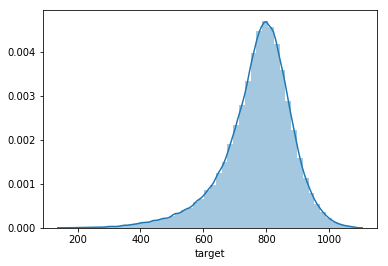

In [23]:
# Histogram of the target variable

sns.distplot(df['target'])

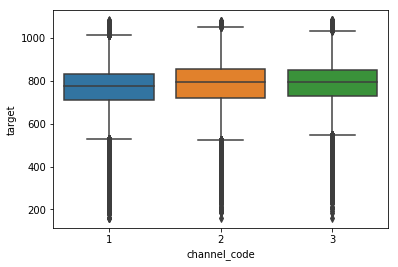

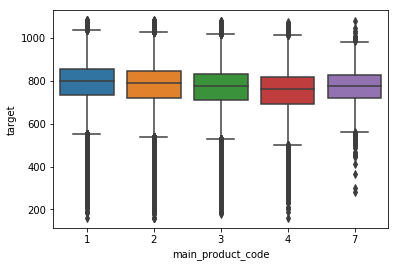

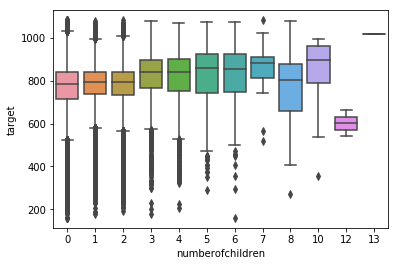

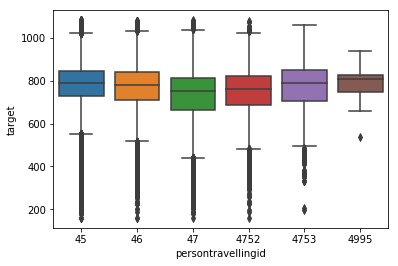

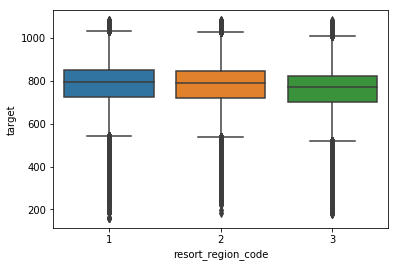

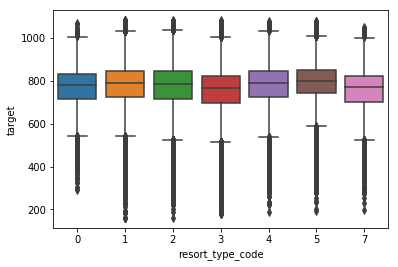

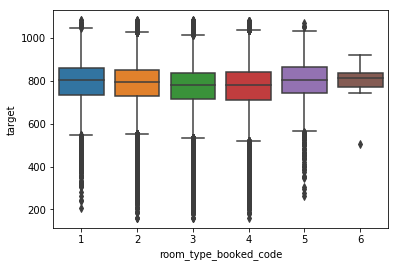

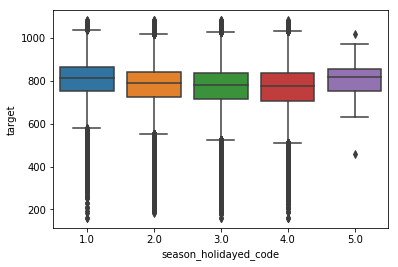

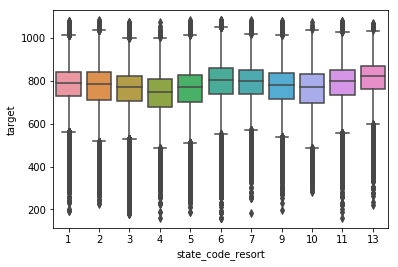

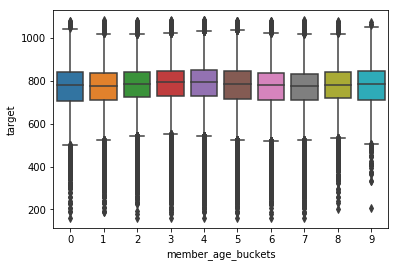

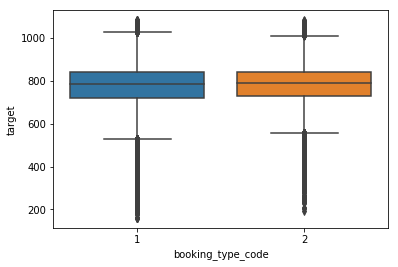

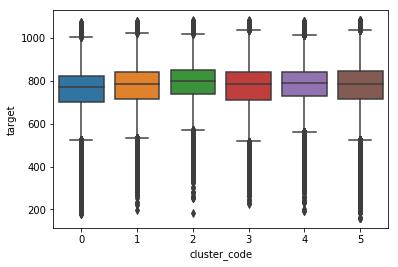

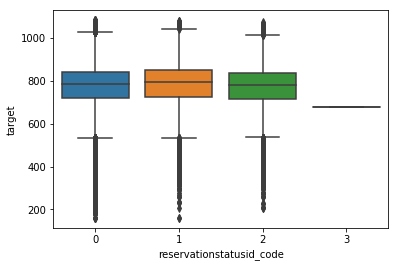

In [24]:
# box plot of all the value_counts list


#f,axes = plt.subplots(6,2,figsize = (15,15))

for i,col in enumerate(value_counts_li):
    sns.boxplot(x=col,y='target',data=df)
    plt.show()

In [25]:
# Printing average values

for col in value_counts_li:
    print(str(col).center(50,"*"))
    print(df.groupby(col)['target'].mean().sort_values())
    print()


*******************channel_code*******************
channel_code
1    761.811066
2    778.007651
3    782.595897
Name: target, dtype: float64

****************main_product_code*****************
main_product_code
4    747.955682
3    763.408768
7    769.833723
2    774.151372
1    786.463552
Name: target, dtype: float64

*****************numberofchildren*****************
numberofchildren
12     602.011436
8      759.088293
0      769.473967
2      778.423505
1      780.021146
4      807.654400
5      808.129950
3      814.206014
6      816.761938
10     833.093864
7      853.893926
13    1019.117631
Name: target, dtype: float64

****************persontravellingid****************
persontravellingid
47      731.310264
4752    746.301638
46      766.946061
4753    767.609829
45      778.524391
4995    780.993474
Name: target, dtype: float64

****************resort_region_code****************
resort_region_code
3    754.162361
2    774.362691
1    778.253135
Name: target, dtype: float64

***

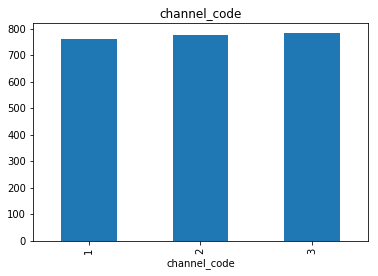

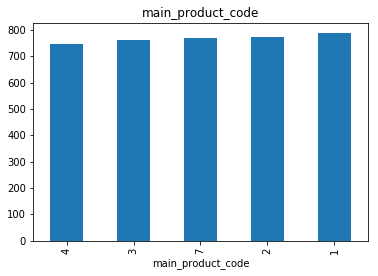

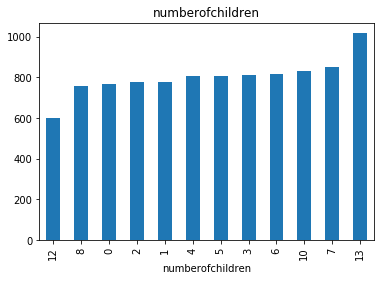

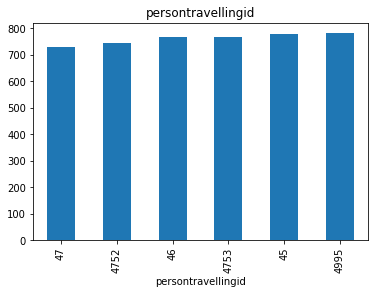

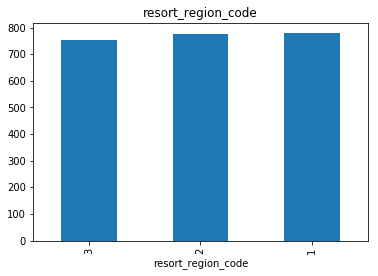

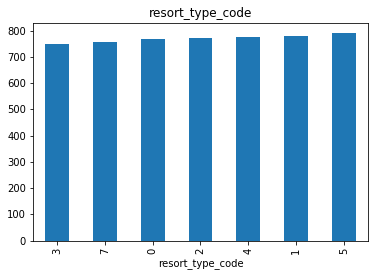

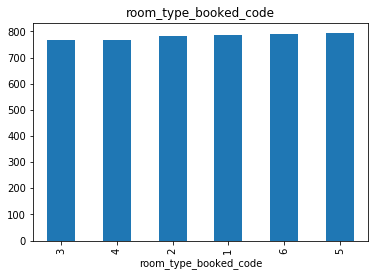

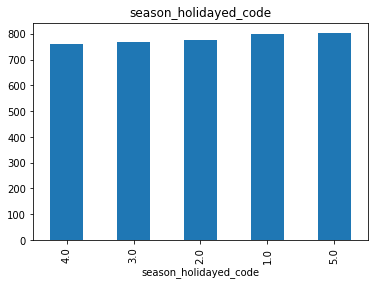

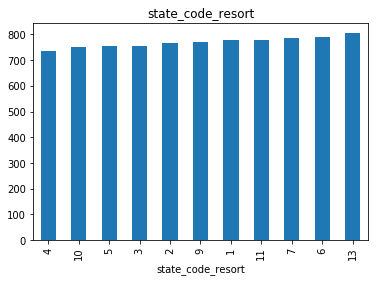

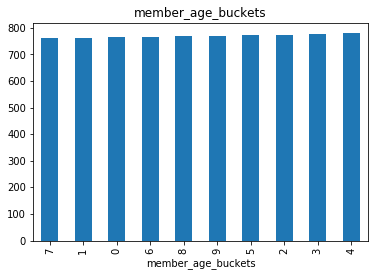

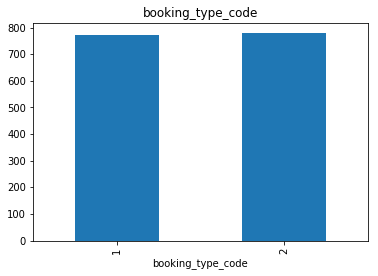

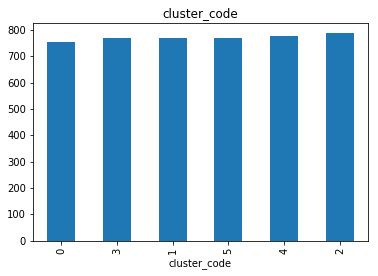

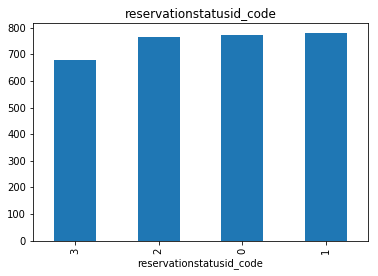

In [26]:
# creating lineplots

for col in value_counts_li:
    df.groupby(col)['target'].mean().sort_values().plot.bar()
    plt.title(col)
    plt.show()

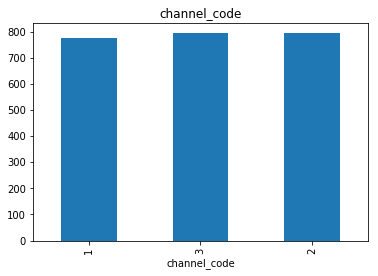

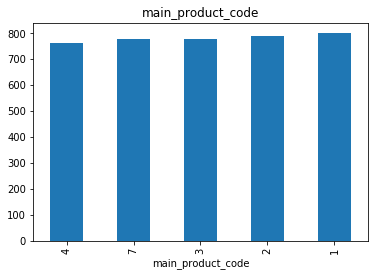

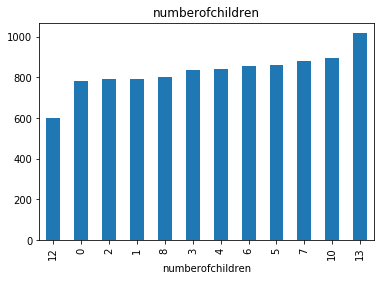

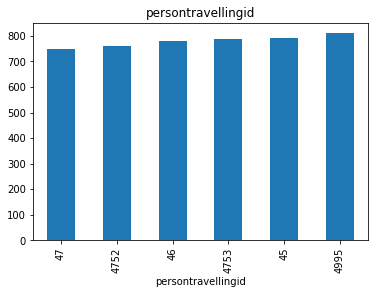

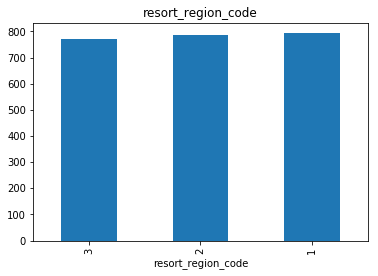

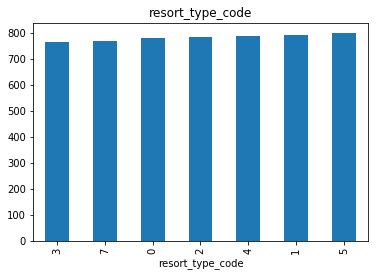

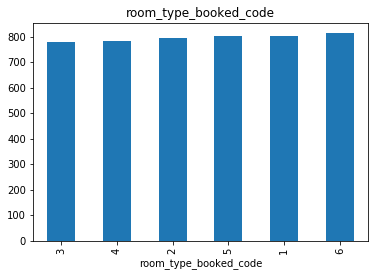

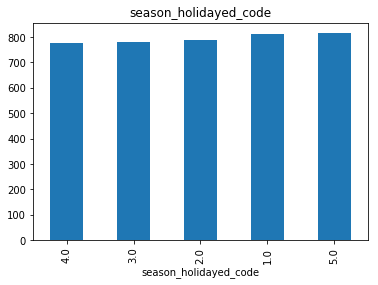

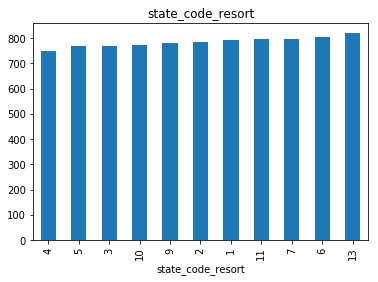

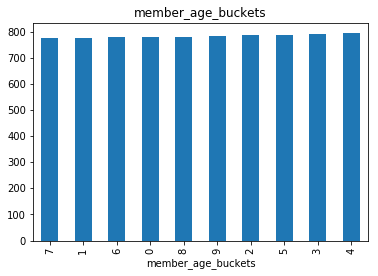

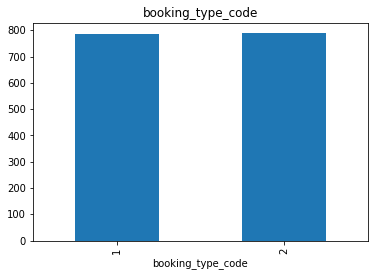

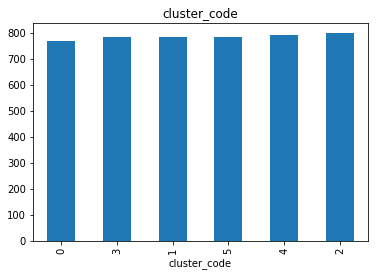

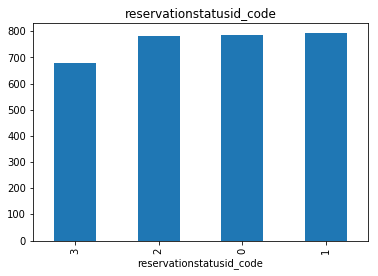

In [27]:
for col in value_counts_li:
    df.groupby(col)['target'].median().sort_values().plot.bar()
    plt.title(col)
    plt.show()

### Feature Engg

In [28]:
df.columns

Index(['reservation_id', 'booking_date', 'checkin_date', 'checkout_date',
       'channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'memberid',
       'cluster_code', 'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled', 'target'],
      dtype='object')

In [29]:
# No of days in advance the booking is done

df['advance_booking_day'] = df['checkin_date']-df['booking_date']
df.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,target,advance_booking_day
0,9785,2018-04-05,2018-04-05,2018-04-06,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,5,1,24179,5,2,7,7.706428,770.642846,0 days
1,4694,2015-01-23,2015-04-11,2015-04-16,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,5,1,24179,5,0,1,6.662563,666.256293,78 days
2,278743,2015-01-28,2015-02-01,2015-02-05,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,5,1,24179,4,0,9,7.871602,787.160208,4 days
3,276853,2015-05-02,2015-06-11,2015-06-16,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,5,1,24179,3,0,25,5.344943,534.494329,40 days
4,196536,2015-09-02,2015-12-14,2015-12-19,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,5,1,24179,3,0,25,7.059346,705.934611,103 days


In [30]:
# no of days stay

df['days_stay'] = (df['checkout_date']-df['checkin_date'])
df.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,target,advance_booking_day,days_stay
0,9785,2018-04-05,2018-04-05,2018-04-06,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,5,1,24179,5,2,7,7.706428,770.642846,0 days,1 days
1,4694,2015-01-23,2015-04-11,2015-04-16,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,5,1,24179,5,0,1,6.662563,666.256293,78 days,5 days
2,278743,2015-01-28,2015-02-01,2015-02-05,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,5,1,24179,4,0,9,7.871602,787.160208,4 days,4 days
3,276853,2015-05-02,2015-06-11,2015-06-16,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,5,1,24179,3,0,25,5.344943,534.494329,40 days,5 days
4,196536,2015-09-02,2015-12-14,2015-12-19,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,5,1,24179,3,0,25,7.059346,705.934611,103 days,5 days


In [31]:
wrong_booking_checking_date_ind = df[df['advance_booking_day'].dt.days<0].index
wrong_booking_checking_date_ind

Int64Index([15, 34, 60, 79, 81, 113, 116, 129, 130, 147, 149, 155], dtype='int64')

In [32]:
# type(df[df['advance_booking_day'].dt.days<0][col])

In [33]:
# df_alter_year = df[df['advance_booking_day'].dt.days<0]
# for col in ['checkin_date','checkout_date']:
#     for row in df_alter_year[col]:
#         row = row.replace(year=2018)
#         print(row)

In [34]:
df[df['advance_booking_day'].dt.days<0]

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,target,advance_booking_day,days_stay
15,173227,2018-04-05,2012-03-08,2012-03-11,3,1,2,0,45,1,1,2,1,3.0,8.0,6,3,7,1,48879,5,2,5,3.218876,321.887583,-2219 days,3 days
34,224056,2018-03-31,2012-03-12,2012-03-18,3,2,3,0,45,1,1,3,2,2.0,5.0,1,3,3,2,84290,4,2,4,7.029715,702.971535,-2210 days,6 days
60,109144,2018-04-05,2012-03-24,2012-03-25,3,2,2,0,45,3,3,3,1,2.0,6.0,3,4,8,1,64346,0,2,30,9.142010,914.201000,-2203 days,1 days
79,112595,2018-04-05,2012-03-21,2012-03-25,1,3,3,1,45,3,3,2,6,2.0,4.0,5,3,4,1,23602,5,0,14,7.252902,725.290207,-2206 days,4 days
81,78438,2018-04-05,2012-03-23,2012-03-26,1,3,4,0,45,1,1,3,4,2.0,2.0,1,3,4,1,99221,4,2,13,7.229536,722.953629,-2204 days,3 days
113,103262,2018-04-06,2012-04-09,2012-04-11,1,2,3,1,45,1,2,2,4,3.0,1.0,11,6,3,1,77200,5,2,27,6.516391,651.639068,-2188 days,2 days
116,189937,2018-04-06,2012-04-14,2012-04-15,1,3,4,0,45,1,2,2,2,3.0,1.0,11,4,6,1,28681,5,2,27,8.819591,881.959057,-2183 days,1 days
129,11034,2018-04-06,2012-04-19,2012-04-21,3,1,2,0,45,3,3,4,1,2.0,5.0,5,3,1,1,57672,5,2,1,8.246436,824.643586,-2178 days,2 days
130,152497,2018-04-06,2012-04-19,2012-04-21,3,1,2,0,45,3,3,4,1,2.0,5.0,5,3,1,1,57672,5,2,1,3.193578,319.357828,-2178 days,2 days
147,303351,2018-04-06,2012-04-22,2012-04-26,3,3,4,0,45,1,1,3,1,3.0,9.0,6,3,1,2,4789,5,0,22,7.017013,701.701270,-2175 days,4 days


/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


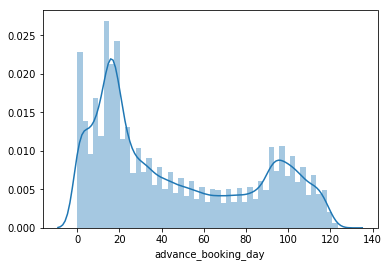

In [35]:
# distribution of people booking in advance

sns.distplot(df[df['advance_booking_day'].dt.days>-1]['advance_booking_day'].dt.days)

In [36]:
df['advance_booking_day'].nunique()

138

In [37]:
df[df['advance_booking_day'].dt.days>-1]['advance_booking_day'].value_counts().sort_index()


0 days       8804
1 days       6138
2 days       4651
3 days       4210
4 days       3757
5 days       3999
6 days       4084
7 days       4180
8 days       4727
9 days       4941
10 days      4826
11 days      5016
12 days      5249
13 days      5845
14 days      7170
15 days     10109
16 days      9624
17 days      8668
18 days      7904
19 days      6834
20 days      6172
21 days      5204
22 days      4760
23 days      4081
24 days      3730
25 days      3464
26 days      3124
27 days      3022
28 days      2975
29 days      3004
30 days      2906
31 days      3176
32 days      3019
33 days      2641
34 days      2643
35 days      2534
36 days      2383
37 days      2383
38 days      2342
39 days      2270
40 days      2152
41 days      2148
42 days      2156
43 days      2102
44 days      2109
45 days      2024
46 days      2029
47 days      1860
48 days      1908
49 days      1810
50 days      1811
51 days      1827
52 days      1759
53 days      1832
54 days      1720
55 days   

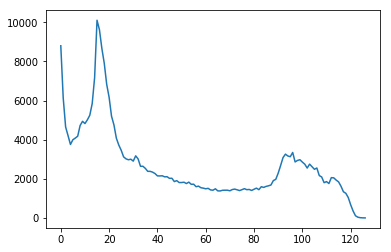

In [38]:
plt.plot(df[df['advance_booking_day'].dt.days>-1]['advance_booking_day'].value_counts().sort_index().index.days,df[df['advance_booking_day'].dt.days>-1]['advance_booking_day'].value_counts().sort_index())
plt.show()

In [39]:
df[df['advance_booking_day'].dt.days>-1].groupby('advance_booking_day')['target'].mean()

advance_booking_day
0 days      809.608673
1 days      772.760830
2 days      772.755672
3 days      773.485425
4 days      770.701559
5 days      768.669067
6 days      768.730936
7 days      767.527862
8 days      772.759374
9 days      769.764129
10 days     770.332889
11 days     775.545570
12 days     771.406410
13 days     770.091031
14 days     770.651010
15 days     773.483275
16 days     773.861288
17 days     773.399698
18 days     773.648147
19 days     776.881959
20 days     773.944105
21 days     775.468275
22 days     775.227625
23 days     775.915158
24 days     773.822191
25 days     776.285125
26 days     774.146475
27 days     776.768969
28 days     782.577945
29 days     779.242908
30 days     777.602040
31 days     774.891546
32 days     775.560816
33 days     778.156844
34 days     778.640217
35 days     774.610927
36 days     780.038969
37 days     777.191741
38 days     776.859285
39 days     775.640954
40 days     775.795905
41 days     773.754943
42 days     77

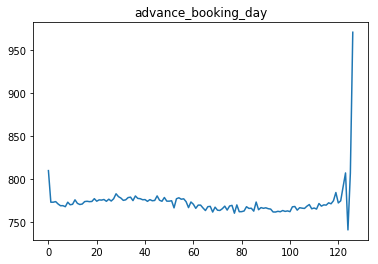

In [40]:
# mean spend vs advance booking day


plt.plot(df[df['advance_booking_day'].dt.days>-1].groupby('advance_booking_day')['target'].mean().index.days,df[df['advance_booking_day'].dt.days>-1].groupby('advance_booking_day')['target'].mean())
plt.title('advance_booking_day')
plt.show()

In [41]:
df['days_stay'].nunique()

16

In [42]:
df['days_stay'].value_counts()

2 days     119723
3 days     109726
1 days      64829
4 days      33347
5 days       9509
6 days       2655
7 days       1424
8 days        124
9 days         41
10 days        27
12 days         5
11 days         5
14 days         4
13 days         3
26 days         1
21 days         1
Name: days_stay, dtype: int64

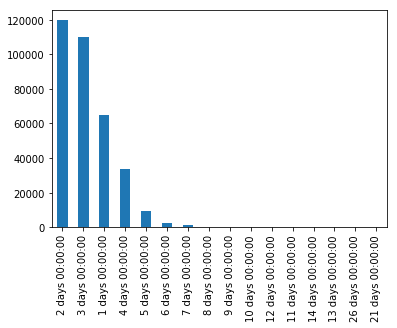

In [43]:
df['days_stay'].value_counts().plot.bar()

In [44]:
len(df[df['days_stay'].dt.days<8])

341213

In [45]:
df.groupby('days_stay')['target'].mean()

days_stay
1 days     821.946638
2 days     769.814508
3 days     755.766265
4 days     750.014647
5 days     745.054813
6 days     735.272853
7 days     724.379044
8 days     718.385235
9 days     705.005582
10 days    715.349273
11 days    667.522641
12 days    666.207872
13 days    543.371927
14 days    723.891252
21 days    603.926896
26 days    760.172501
Name: target, dtype: float64

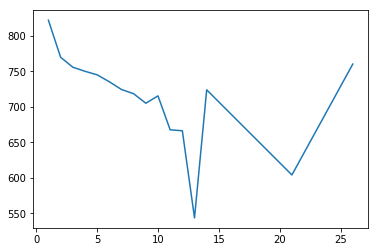

In [46]:
# mean_spend vs days stayed

plt.plot(df.groupby('days_stay')['target'].mean().index.days,df.groupby('days_stay')['target'].mean())